In [1]:
import os
import pandas as pd
import numpy as np

##create a summary table for 
path = 'D:/berkeley/290/ppp/'
files= os.listdir(path)

In [4]:
df = pd.read_csv(path + 'summary.csv')

TypeError: parser_f() got an unexpected keyword argument 'index'

In [5]:
df = df[['sku_id','order_time','sales','sales_sum/2w']]
df['order_time'] = pd.to_datetime(df['order_time'])

In [7]:
df['order_time'] = pd.to_datetime(df['order_time'])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
def find_var(df):
    df['mean'] = np.mean(df['sales_sum/2w'])
    df['std'] = np.std(df['sales_sum/2w'])
    start = pd.to_datetime('2017-04-01')
    end = pd.to_datetime('2017-04-30')
    df_new= df.loc[(df['order_time'] > start) & (df['order_time'] < end)]
    df['mean_new'] = np.mean(df_new['sales_sum/2w'])
    df['std_new'] = np.std(df_new['sales_sum/2w'])
    
    return df

In [15]:
dd = df.groupby('sku_id').apply(find_var)

In [34]:
tt = dd.loc[dd['mean_new'] > dd['mean'] + 3*dd['std']]
lis = tt['sku_id'].drop_duplicates(

TypeError: 'Series' object is not callable

In [36]:
lis = lis.to_list()

In [44]:
lis

[10452,
 17345,
 26486,
 29813,
 3019,
 3471,
 49570,
 53975,
 59429,
 59600,
 62702,
 88752,
 94092,
 98739]

In [37]:
dfnew = df.loc[df['sku_id'].isin(lis)]


In [41]:
train_y = []
for i in range(len(lis)):
    tt= dfnew.loc[dfnew['sku_id'] == lis[i]]
    train_y.append(np.array(tt['sales_sum/2w']))

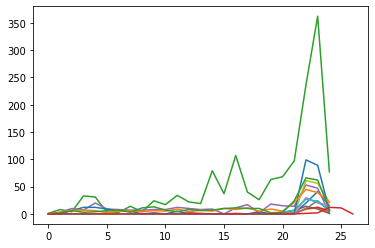

In [43]:
for i in range(len(train_y)):
    plt.plot(train_y[i])

In [29]:
lis[1]

KeyError: 1

In [10]:
train_x = []
train_y = []
for file in files: 
     if not os.path.isdir(file): 
            try:
                sample = pd.read_csv(path + '/' + file)
                sample['order_time'] = pd.to_datetime(sample['order_time'])
                sample['output'] = sample['sales_sum/2w'].shift(-1)
                sample.to_csv(path + '/' + file)
                train_x.append(sample.values[:,:-1])
                train_y.append(sample.values[:,-1])
            except: 
                break


In [11]:
len(train_y)

2868

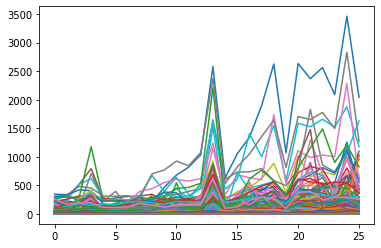

In [15]:
import matplotlib.pyplot as plt
plt.plot(train_y)

In [3]:
special_date = [pd.to_datetime('2016-11-13'),pd.to_datetime('2016-10-30')]
special_date

[Timestamp('2016-11-13 00:00:00'), Timestamp('2016-10-30 00:00:00')]

In [5]:
path2 = 'D:/berkeley/290/ppp/prep_new2'
train_x = []
train_y = []
for file in files: 
     if not os.path.isdir(file): 
            try:
                sample = pd.read_csv(path + '/' + file)
                sample['order_time'] = pd.to_datetime(sample['order_time'])
                sample['output'] = sample['sales_sum/2w'].shift(-1)
                sample = sample[~sample['order_time'].isin(special_date)]
                sample.to_csv(path2 + '/' + file)
                train_x.append(sample.values[:,:-1])
                train_y.append(sample.values[:,-1])
            except: 
                break

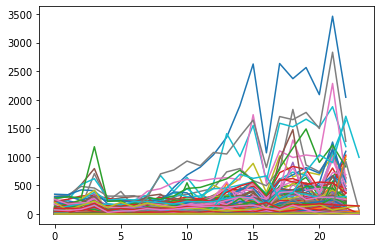

In [8]:
import matplotlib.pyplot as plt
for i in range(len(train_y)):
    plt.plot(train_y[i])

In [20]:
sales_list = np.array(train_y[0])
for item in train_y[1:]:
    sales_list = np.concatenate((sales_list,np.array(item)))

import math
sales_list = [value for value in sales_list if not math.isnan(value)]

(array([5.7395e+04, 4.4160e+03, 1.6570e+03, 9.5100e+02, 5.9300e+02,
        3.8500e+02, 2.9800e+02, 2.2500e+02, 1.5700e+02, 1.4400e+02,
        1.2400e+02, 8.8000e+01, 8.3000e+01, 8.1000e+01, 6.1000e+01,
        5.3000e+01, 5.6000e+01, 3.3000e+01, 4.9000e+01, 2.9000e+01,
        1.7000e+01, 1.1000e+01, 2.4000e+01, 1.7000e+01, 1.7000e+01,
        1.2000e+01, 1.5000e+01, 1.4000e+01, 7.0000e+00, 1.0000e+01]),
 array([  0.        ,  16.66666667,  33.33333333,  50.        ,
         66.66666667,  83.33333333, 100.        , 116.66666667,
        133.33333333, 150.        , 166.66666667, 183.33333333,
        200.        , 216.66666667, 233.33333333, 250.        ,
        266.66666667, 283.33333333, 300.        , 316.66666667,
        333.33333333, 350.        , 366.66666667, 383.33333333,
        400.        , 416.66666667, 433.33333333, 450.        ,
        466.66666667, 483.33333333, 500.        ]),
 <a list of 30 Patch objects>)

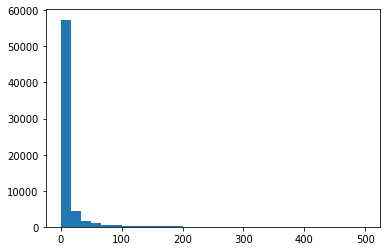

In [25]:
plt.hist(sales_list, bins=30, range=(0,500))

In [ ]:
###summary
path2 = 'D:/berkeley/290/ppp/prep_new2'
train_x = []
train_y = []
for file in files: 
     if not os.path.isdir(file): 
            try:
                sample = pd.read_csv(path + '/' + file)
                sample['order_time'] = pd.to_datetime(sample['order_time'])
                sample['output'] = sample['sales_sum/2w'].shift(-1)
                sample = sample[~sample['order_time'].isin(special_date)]
                sample.to_csv(path2 + '/' + file)
                train_x.append(sample.values[:,:-1])
                train_y.append(sample.values[:,-1])
            except: 
                break

In [3]:
path2 = 'D:/berkeley/290/ppp/prep_new2'
sample = pd.read_csv(path2 + '/' + files[0],index_col=0)

In [6]:
col_list = [item for item in sample.columns.tolist() if 'Unnamed' in item]
col_list

['Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1']

In [8]:
sample.drop(columns = col_list,inplace = True)

In [9]:
sample

,sku_id,order_time,sales,sales_sum/2w,sales_sum/month,sales_sum/quarter,comment_sum,comment_mean,comment_mean/2w,comment_mean/month,...,area,area_sum/2w,area_sum/month,area_sum/quarter,price,cate,para_1,para_2,para_3,output
0,10033,2016-05-01,0,0.0,0.0,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,1375.3,30.0,667.43,-1.0,-1.0,0.0
1,10033,2016-05-15,0,0.0,0.0,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,1375.3,30.0,667.43,-1.0,-1.0,0.0
2,10033,2016-05-29,0,0.0,0.0,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,1375.3,30.0,667.43,-1.0,-1.0,0.0
3,10033,2016-06-12,0,0.0,0.0,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,1375.3,30.0,667.43,-1.0,-1.0,0.0
4,10033,2016-06-26,0,0.0,0.0,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,1375.3,30.0,667.43,-1.0,-1.0,0.0
5,10033,2016-07-10,0,0.0,0.0,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,1375.3,30.0,667.43,-1.0,-1.0,0.0
6,10033,2016-07-24,0,0.0,0.0,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,1375.3,30.0,667.43,-1.0,-1.0,0.0
7,10033,2016-08-07,0,0.0,0.0,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,1375.3,30.0,667.43,-1.0,-1.0,0.0
8,10033,2016-08-21,0,0.0,0.0,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,1375.3,30.0,667.43,-1.0,-1.0,0.0
9,10033,2016-09-04,0,0.0,0.0,0.0,0,0,0.0,0.0,...,0,0.0,0.0,0.0,1375.3,30.0,667.43,-1.0,-1.0,0.0


In [10]:
path2 = 'D:/berkeley/290/ppp/prep_new2'
sample = pd.read_csv(path2 + '/' + files[0])
col_list = [item for item in sample.columns.tolist() if 'Unnamed' in item]
sample.drop(columns = col_list,inplace = True)
for file in files[1:]: 
     if not os.path.isdir(file): 
            try:
                sample1 = pd.read_csv(path + '/' + file)
                col_list = [item for item in sample.columns.tolist() if 'Unnamed' in item]
                sample.drop(columns = col_list,inplace = True)
                sample = pd.concat([sample,sample1],sort = False)
            except: 
                break

In [11]:
sample

,sku_id,order_time,sales,sales_sum/2w,sales_sum/month,sales_sum/quarter,comment_sum,comment_mean,comment_mean/2w,comment_mean/month,...,area_sum/2w,area_sum/month,area_sum/quarter,price,cate,para_1,para_2,para_3,output,Unnamed: 0
0,10033,2016-05-01,0,0.0,0.0,0.0,0,0,0.0,0.0,...,0.0,0.0,0.0,1375.3,30.0,667.43,-1.0,-1.0,0.0,NaN
1,10033,2016-05-15,0,0.0,0.0,0.0,0,0,0.0,0.0,...,0.0,0.0,0.0,1375.3,30.0,667.43,-1.0,-1.0,0.0,NaN
2,10033,2016-05-29,0,0.0,0.0,0.0,0,0,0.0,0.0,...,0.0,0.0,0.0,1375.3,30.0,667.43,-1.0,-1.0,0.0,NaN
3,10033,2016-06-12,0,0.0,0.0,0.0,0,0,0.0,0.0,...,0.0,0.0,0.0,1375.3,30.0,667.43,-1.0,-1.0,0.0,NaN
4,10033,2016-06-26,0,0.0,0.0,0.0,0,0,0.0,0.0,...,0.0,0.0,0.0,1375.3,30.0,667.43,-1.0,-1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,9981,2017-03-05,0,13.0,25.0,35.0,3,1,1.0,1.0,...,12.0,22.0,28.0,316.3,101.0,174.05,4.0,4.0,12.0,308.0
23,9981,2017-03-19,0,4.0,18.0,39.0,0,0,1.0,1.0,...,4.0,17.0,32.0,316.3,101.0,174.05,4.0,4.0,13.0,322.0
24,9981,2017-04-02,0,9.0,13.0,48.0,0,0,1.0,1.0,...,8.0,12.0,40.0,316.3,101.0,174.05,4.0,4.0,4.0,336.0
25,9981,2017-04-16,0,5.0,14.0,49.0,0,0,1.5,1.4,...,4.0,12.0,42.0,316.3,101.0,174.05,4.0,4.0,9.0,350.0


In [18]:
sample.sort_values(key = 'sale')

AttributeError: 'DataFrame' object has no attribute 'sort'

In [12]:
path = 'D:/berkeley/290/ppp/'
sample.to_csv(path + 'summary.csv')

In [53]:
sample.dropna(subset = ['output'])
sample = sample.iloc[:,3:]

In [59]:
sample[['cate','output']].groupby('cate').describe()

output                                                   
         count       mean        std  min  25%  50%   75%     max
cate                                                             
1.0     4908.0   8.665240  19.096907  0.0  0.0  2.0   9.0   227.0
30.0   10076.0  18.569472  57.021360  0.0  0.0  2.0  12.0  1022.0
46.0    3992.0   7.519790  45.236184  0.0  0.0  1.0   4.0  1710.0
71.0   14032.0  14.826896  49.673512  0.0  0.0  2.0  11.0  1520.0
83.0    7280.0   5.824313  11.326041  0.0  0.0  2.0   6.0   132.0
101.0  29870.0  17.077569  89.790920  0.0  0.0  2.0   7.0  3461.0

In [61]:
output_list = []
cate_list = list(sample['cate'].drop_duplicates())

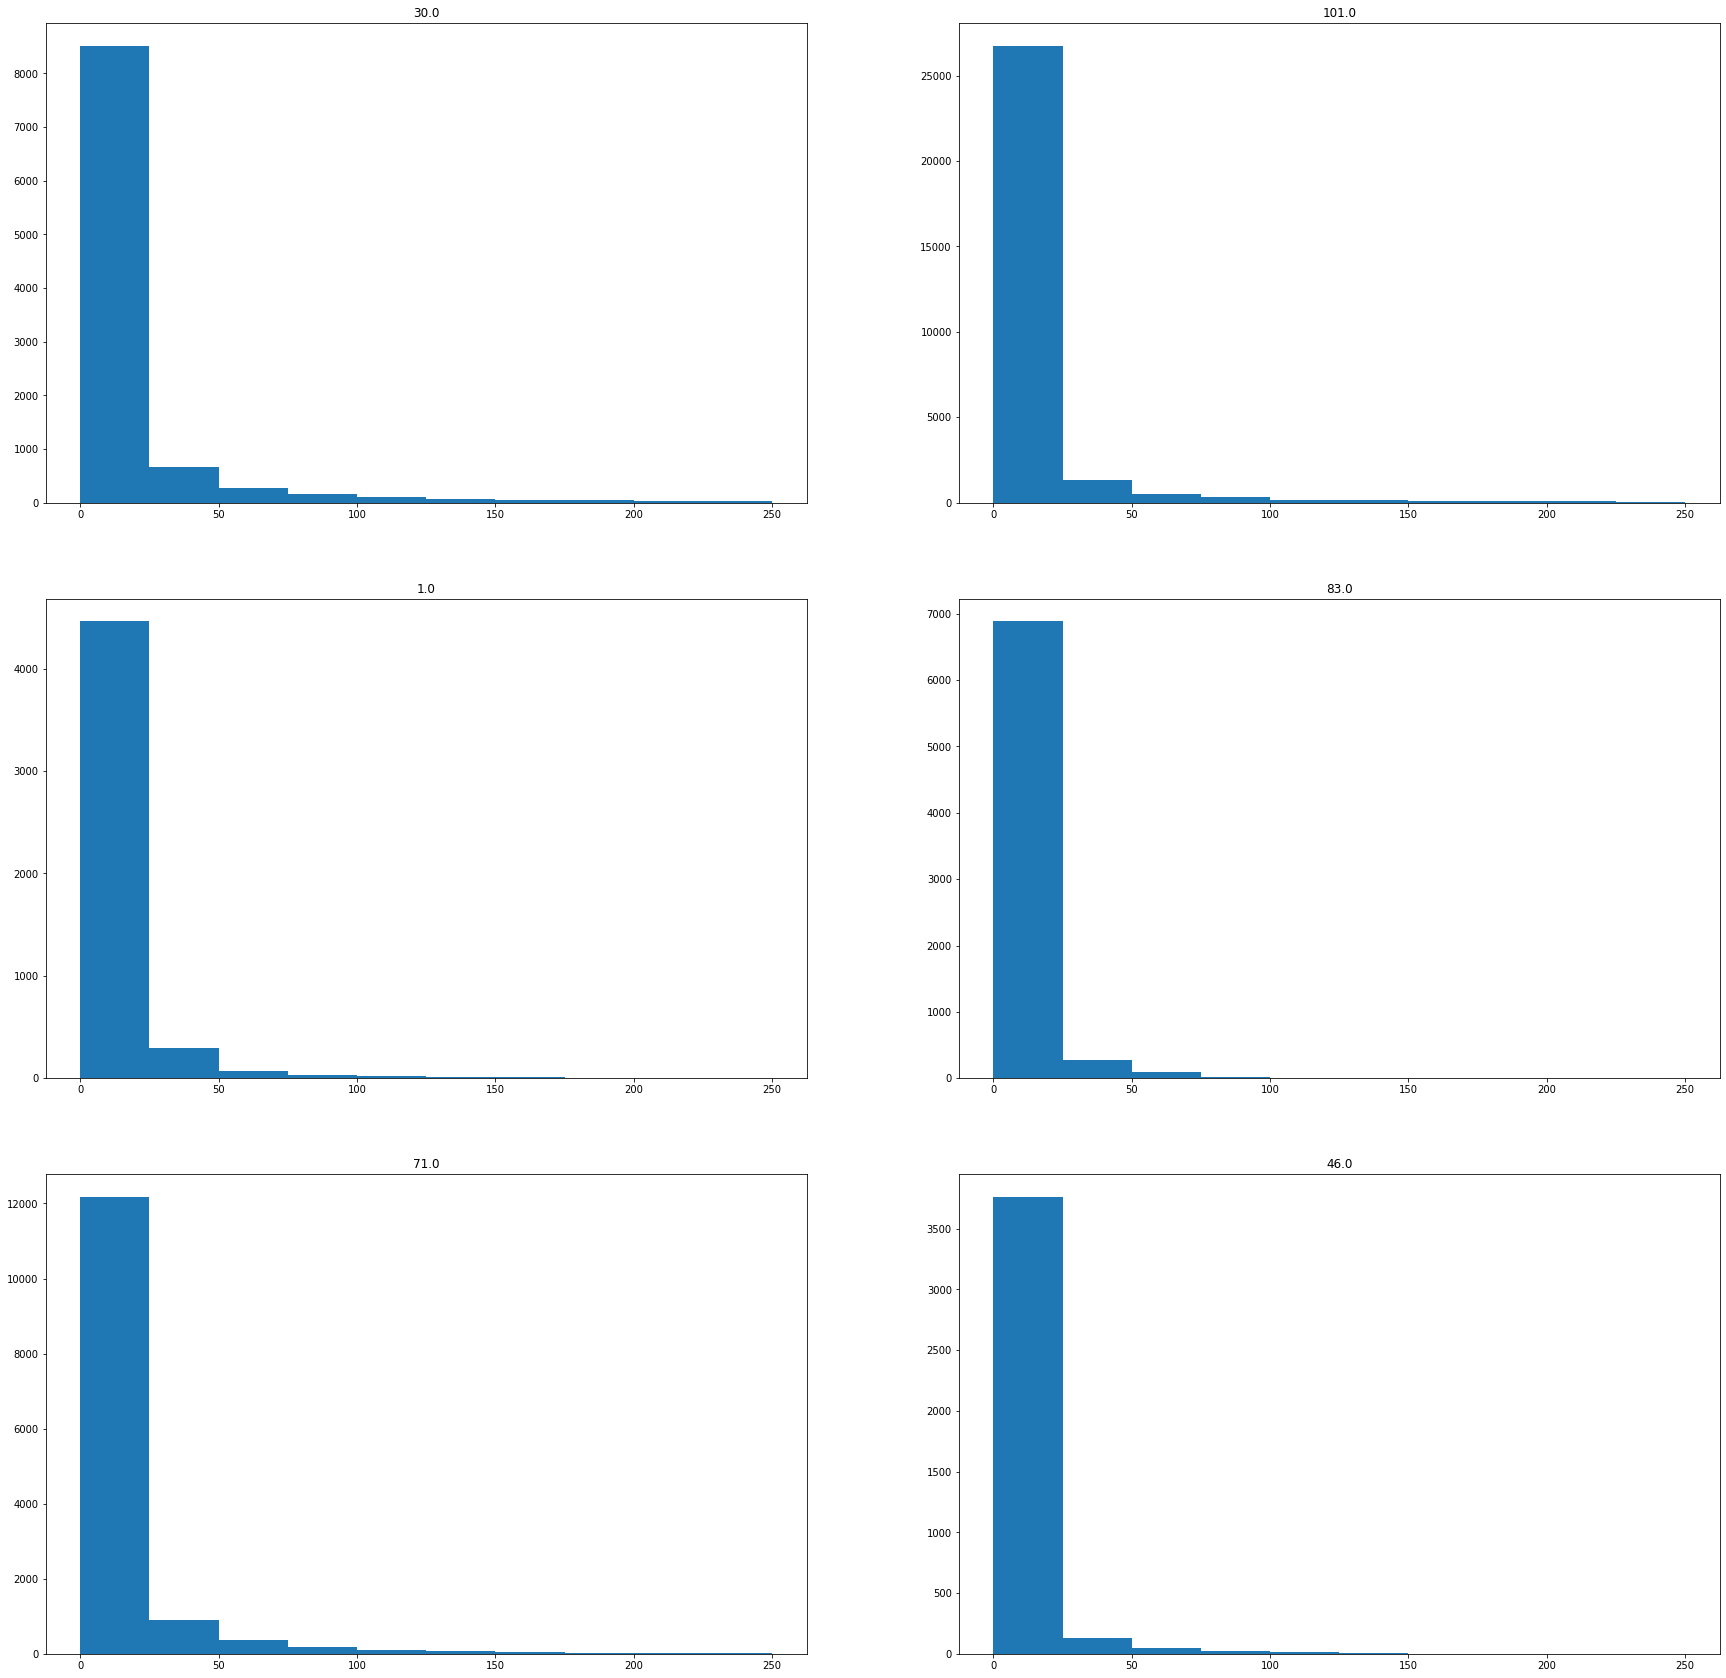

In [68]:
plt.figure(figsize = (30,30))
for i in range(0,6):
    plt.subplot(3,2,i+1)
    plt.hist(list(sample.loc[sample['cate'] == cate_list[i],:]['output']),range=(0,250))
    plt.title(cate_list[i])

plt.subplots_adjust(wspace =0.2, hspace =0.2)
plt.show()

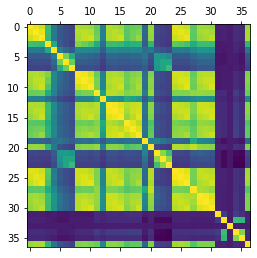

In [70]:
sample.corr()
plt.matshow(sample.corr())
plt.show()

In [71]:
sample.corr()

,sales_sum/2w,sales_sum/month,sales_sum/quarter,comment_sum,comment_mean,comment_mean/2w,comment_mean/month,comment_mean/quarter,comment_sum/2w,comment_sum/month,...,area,area_sum/2w,area_sum/month,area_sum/quarter,price,cate,para_1,para_2,para_3,output
sales_sum/2w,1.000000,0.960443,0.918753,0.665427,0.347718,0.204507,0.162510,0.125406,0.860466,0.853189,...,0.722739,0.846550,0.834322,0.812209,0.006765,0.016238,-0.002070,0.050277,0.033005,0.825837
sales_sum/month,0.960443,1.000000,0.964039,0.659369,0.353811,0.211203,0.170151,0.131421,0.872784,0.892609,...,0.731754,0.847845,0.866682,0.851087,0.006381,0.016614,-0.002167,0.051789,0.033723,0.859447
sales_sum/quarter,0.918753,0.964039,1.000000,0.640821,0.352175,0.210874,0.172327,0.135502,0.858455,0.896876,...,0.723348,0.828726,0.851967,0.885946,0.007014,0.017358,-0.002225,0.052114,0.033302,0.857014
comment_sum,0.665427,0.659369,0.640821,1.000000,0.567025,0.215048,0.165627,0.125172,0.793227,0.750072,...,0.583837,0.659629,0.662522,0.652957,-0.010067,-0.002102,-0.001891,0.030975,0.008857,0.624556
comment_mean,0.347718,0.353811,0.352175,0.567025,1.000000,0.374517,0.288541,0.218377,0.422975,0.419653,...,0.427833,0.487422,0.484888,0.467708,-0.004222,-0.012153,-0.002437,0.029813,-0.005802,0.328167
comment_mean/2w,0.204507,0.211203,0.210874,0.215048,0.374517,1.000000,0.772963,0.586362,0.292532,0.280775,...,0.271121,0.323795,0.325103,0.312437,-0.017617,-0.032129,-0.007169,-0.005599,-0.033168,0.190409
comment_mean/month,0.162510,0.170151,0.172327,0.165627,0.288541,0.772963,1.000000,0.755454,0.225291,0.233406,...,0.219004,0.261450,0.266252,0.260022,-0.017685,-0.024179,-0.007517,-0.005767,-0.026658,0.151554
comment_mean/quarter,0.125406,0.131421,0.135502,0.125172,0.218377,0.586362,0.755454,1.000000,0.170150,0.176202,...,0.167132,0.204046,0.207896,0.207504,-0.012402,-0.008434,-0.009901,0.003849,-0.011174,0.115574
comment_sum/2w,0.860466,0.872784,0.858455,0.793227,0.422975,0.292532,0.225291,0.170150,1.000000,0.971903,...,0.742001,0.874882,0.884654,0.876731,-0.010797,-0.001454,-0.002638,0.045069,0.014318,0.785807
comment_sum/month,0.853189,0.892609,0.896876,0.750072,0.419653,0.280775,0.233406,0.176202,0.971903,1.000000,...,0.765233,0.882169,0.908807,0.916740,-0.012700,-0.002039,-0.002804,0.046588,0.013764,0.797143


Model Selection

1. Baseline:
Weighted rolling:
strong correlation between current sales/2w with output(next sales/2w)


2. Training model:
LR
RF
XGBoost

Time series(ARIMA